# Loan Approval Prediction

### Import Library

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import xgboost as xgb
import lightgbm as lgb
import catboost as cb


# Load the train and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


### Dataset Explorartion

In [4]:
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
train_data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [6]:
train_data.shape

(58645, 13)

In [7]:
train_data.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

### Data Visualization

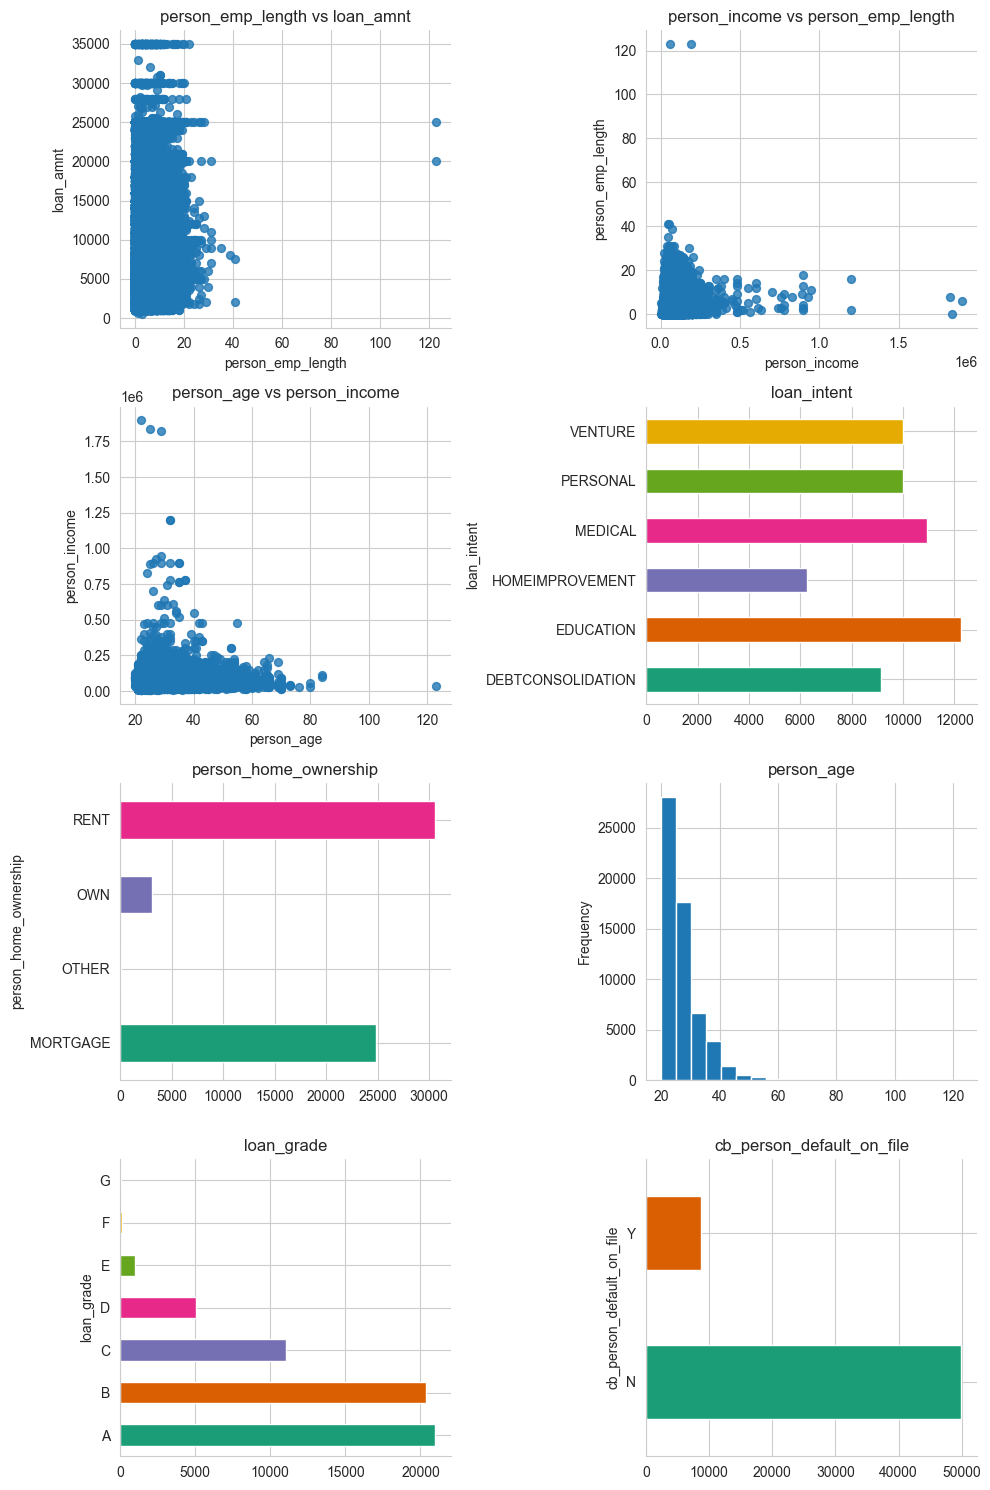

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 4 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(10, 15))  # Adjust the size as needed

# Plot 1: person_emp_length vs loan_amnt
train_data.plot(kind='scatter', x='person_emp_length', y='loan_amnt', s=32, alpha=.8, ax=axes[0, 0])
axes[0, 0].spines[['top', 'right']].set_visible(False)
axes[0, 0].set_title('person_emp_length vs loan_amnt')

# Plot 2: person_income vs person_emp_length
train_data.plot(kind='scatter', x='person_income', y='person_emp_length', s=32, alpha=.8, ax=axes[0, 1])
axes[0, 1].spines[['top', 'right']].set_visible(False)
axes[0, 1].set_title('person_income vs person_emp_length')

# Plot 3: person_age vs person_income
train_data.plot(kind='scatter', x='person_age', y='person_income', s=32, alpha=.8, ax=axes[1, 0])
axes[1, 0].spines[['top', 'right']].set_visible(False)
axes[1, 0].set_title('person_age vs person_income')

# Plot 4: loan_intent bar plot
train_data.groupby('loan_intent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[1, 1])
axes[1, 1].spines[['top', 'right']].set_visible(False)
axes[1, 1].set_title('loan_intent')

# Plot 5: person_home_ownership bar plot
train_data.groupby('person_home_ownership').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[2, 0])
axes[2, 0].spines[['top', 'right']].set_visible(False)
axes[2, 0].set_title('person_home_ownership')

# Plot 6: person_age histogram
train_data['person_age'].plot(kind='hist', bins=20, ax=axes[2, 1])
axes[2, 1].spines[['top', 'right']].set_visible(False)
axes[2, 1].set_title('person_age')

# Plot 7: loan_grade bar plot
train_data.groupby('loan_grade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[3, 0])
axes[3, 0].spines[['top', 'right']].set_visible(False)
axes[3, 0].set_title('loan_grade')

# Plot 8: cb_person_default_on_file bar plot
train_data.groupby('cb_person_default_on_file').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[3, 1])
axes[3, 1].spines[['top', 'right']].set_visible(False)
axes[3, 1].set_title('cb_person_default_on_file')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


### Data Preprocessing

In [6]:
# Preprocessing: Encode categorical features
for col in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
    train_data[col] = train_data[col].astype('category').cat.codes
    test_data[col] = test_data[col].astype('category').cat.codes

# Separate features and target
X = train_data.drop(columns=['loan_status', 'id'])
y = train_data['loan_status']
X_test = test_data.drop(columns=['id'])


### K-Fold Cross Validation and Models Initialization

In [12]:
# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": cb.CatBoostClassifier(iterations=125, depth=7, learning_rate=0.1, random_seed=42, verbose=0),
}

# Prepare to store results
roc_curves = {}
auc_scores = {}

### Random Forest

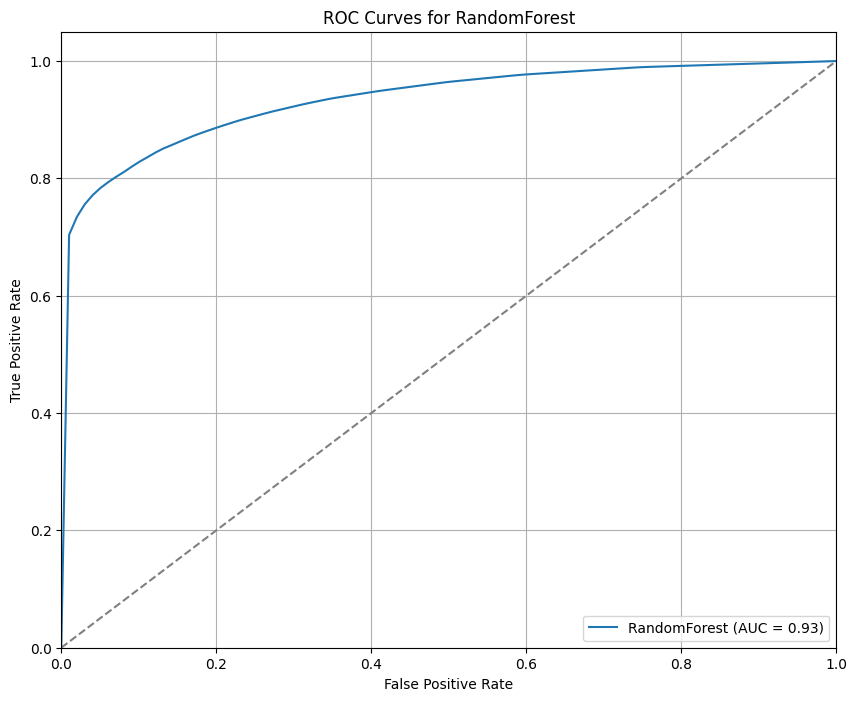

In [14]:
# Cross-validation and ROC curve plotting for RandomForest
plt.figure(figsize=(10, 8))
model_name = "RandomForest"
model = models[model_name]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for train_idx, valid_idx in skf.split(X, y):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    # Fit model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_valid_pred_proba = model.predict_proba(X_valid)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_valid, y_valid_pred_proba)
    roc_curves[model_name] = (fpr, tpr)
    auc = roc_auc_score(y_valid, y_valid_pred_proba)
    aucs.append(auc)

    # Interpolation for smooth ROC curve
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

# Average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
auc_scores[model_name] = mean_auc

# Plot the ROC curve
plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for RandomForest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### XGBoost

d:\LoanApprovalPred\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\LoanApprovalPred\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\LoanApprovalPred\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\LoanApprovalPred\venv\Lib\site-packages\

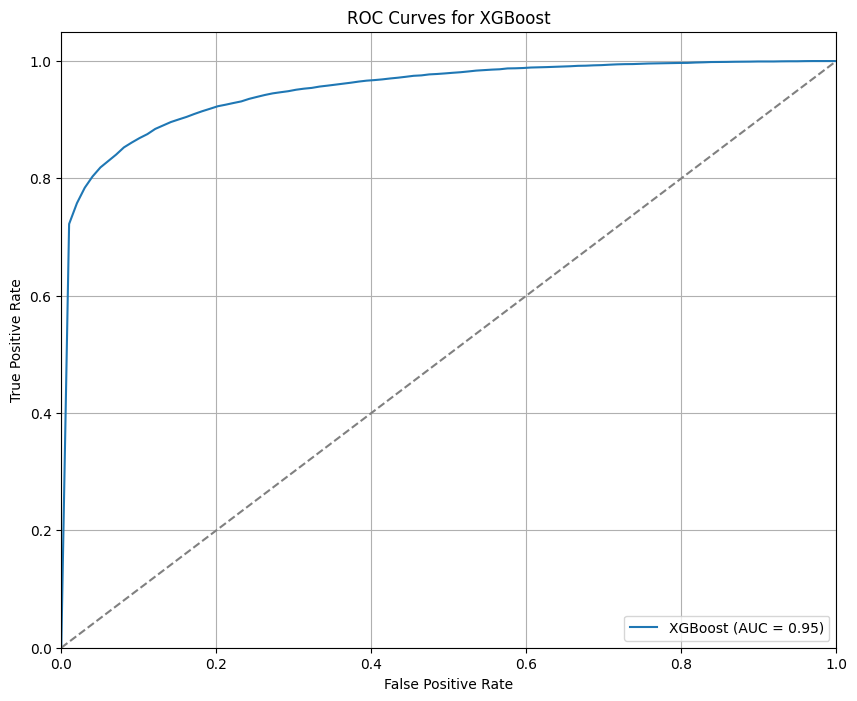

In [18]:
# Cross-validation and ROC curve plotting for XGBoost
plt.figure(figsize=(10, 8))
model_name = "XGBoost"
model = models[model_name]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for train_idx, valid_idx in skf.split(X, y):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    # Fit model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_valid_pred_proba = model.predict_proba(X_valid)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_valid, y_valid_pred_proba)
    roc_curves[model_name] = (fpr, tpr)
    auc = roc_auc_score(y_valid, y_valid_pred_proba)
    aucs.append(auc)

    # Interpolation for smooth ROC curve
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

# Average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
auc_scores[model_name] = mean_auc

# Plot the ROC curve
plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### LightGBM

[LightGBM] [Info] Number of positive: 6680, number of negative: 40236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142382 -> initscore=-1.795644
[LightGBM] [Info] Start training from score -1.795644
[LightGBM] [Info] Number of positive: 6680, number of negative: 40236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 11
[LightGBM] [Info] [bin

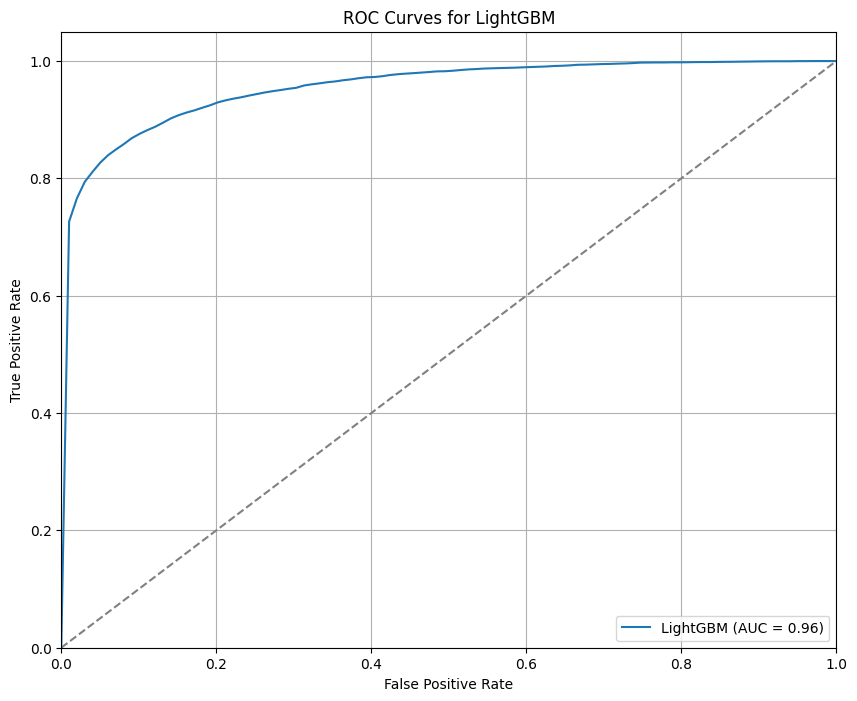

In [19]:
# Cross-validation and ROC curve plotting for LightGBM
plt.figure(figsize=(10, 8))
model_name = "LightGBM"
model = models[model_name]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for train_idx, valid_idx in skf.split(X, y):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    # Fit model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_valid_pred_proba = model.predict_proba(X_valid)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_valid, y_valid_pred_proba)
    roc_curves[model_name] = (fpr, tpr)
    auc = roc_auc_score(y_valid, y_valid_pred_proba)
    aucs.append(auc)

    # Interpolation for smooth ROC curve
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

# Average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
auc_scores[model_name] = mean_auc

# Plot the ROC curve
plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for LightGBM')
plt.legend(loc='lower right')
plt.grid()
plt.show()


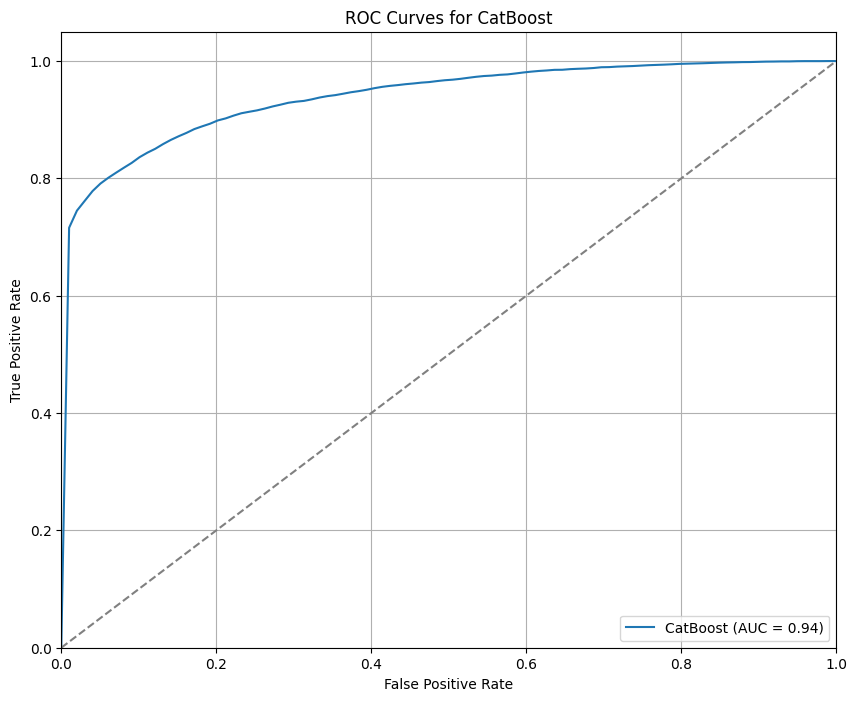

In [16]:
# Cross-validation and ROC curve plotting for LightGBM
plt.figure(figsize=(10, 8))
model_name = "CatBoost"
model = models[model_name]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for train_idx, valid_idx in skf.split(X, y):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    # Fit model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_valid_pred_proba = model.predict_proba(X_valid)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_valid, y_valid_pred_proba)
    roc_curves[model_name] = (fpr, tpr)
    auc = roc_auc_score(y_valid, y_valid_pred_proba)
    aucs.append(auc)

    # Interpolation for smooth ROC curve
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

# Average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
auc_scores[model_name] = mean_auc

# Plot the ROC curve
plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for CatBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [20]:
# Find the model with the best AUC score
best_model_name = max(auc_scores, key=auc_scores.get)

# Train the best model on the full dataset
best_model = models[best_model_name]
best_model.fit(X, y)
test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Save the predictions for the best model
final_predictions = pd.DataFrame()
final_predictions['id'] = test_data['id']
final_predictions['best_model_loan_status'] = test_pred_proba

# Output the final submission
submission = final_predictions[['id', 'best_model_loan_status']].rename(columns={'best_model_loan_status': 'loan_status'})
submission.to_csv('submission.csv', index=False)

print(f"Submission file created using the best model ({best_model_name}): 'submission.csv'")


[LightGBM] [Info] Number of positive: 8350, number of negative: 50295
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 58645, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142382 -> initscore=-1.795644
[LightGBM] [Info] Start training from score -1.795644
Submission file created using the best model (LightGBM): 'submission.csv'
